This script generate the demo of drag thrust profile to showcase the advantage of BEMT in simulating disturbances.

[PropellerLookupTable] Reading data from lookup_table\apc_8x6_with_trail.yaml


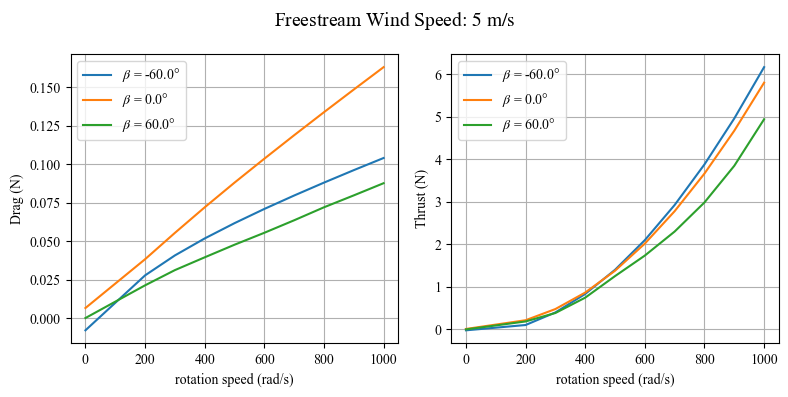

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from propeller_lookup_table import PropellerLookupTable

apc_8x6 = PropellerLookupTable.Reader("apc_8x6_with_trail")

u_free_x_range = [5]
pitch_range = np.deg2rad([-90, -60, -30, 0, 30, 60, 90])
pitch_range = np.deg2rad([-60, 0, 60])    # for paper fig
omega_range = np.array([0, 200, 300, 400, 500, 600, 700, 800, 900, 1000])

forces_grouped_by_pitch_then_omega = []
for u_free_x in u_free_x_range:
    for pitch in pitch_range:
        forces_by_omega = []
        for omega in omega_range:
            forces_by_omega.append(apc_8x6.query_data_from_table(u_free_x, pitch, omega))
        forces_grouped_by_pitch_then_omega.append(forces_by_omega)
forces_grouped_by_pitch_then_omega = np.array(forces_grouped_by_pitch_then_omega)


# Paper figure setting
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams["mathtext.fontset"] = "stix"
figsize = (8, 4)  # taller to fit both subplots nicely
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize, sharex=True)

# --- Drag plot ---
for i, pitch in enumerate(pitch_range):
    ax1.plot(omega_range, forces_grouped_by_pitch_then_omega[i, :, 0],
             label=fr"$\beta$ = {np.rad2deg(pitch):.1f}°")
ax1.set_xlabel("rotation speed (rad/s)")
ax1.set_ylabel("Drag (N)")
ax1.legend()
ax1.grid()

# --- Thrust plot ---
for i, pitch in enumerate(pitch_range):
    ax2.plot(omega_range, forces_grouped_by_pitch_then_omega[i, :, 2],
             label=fr"$\beta$ = {np.rad2deg(pitch):.1f}°")
ax2.set_xlabel("rotation speed (rad/s)")
ax2.set_ylabel("Thrust (N)")
ax2.legend()
ax2.grid()

fig.suptitle(r"Freestream Wind Speed: $5\ \mathrm{m/s}$", fontsize=14)
fig.tight_layout()
fig.savefig("bemt_drag_thrust_combined.pdf", bbox_inches="tight")
plt.show()